In [774]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# 6 13 16

In [775]:
df = pd.read_csv('HWdata/bank/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


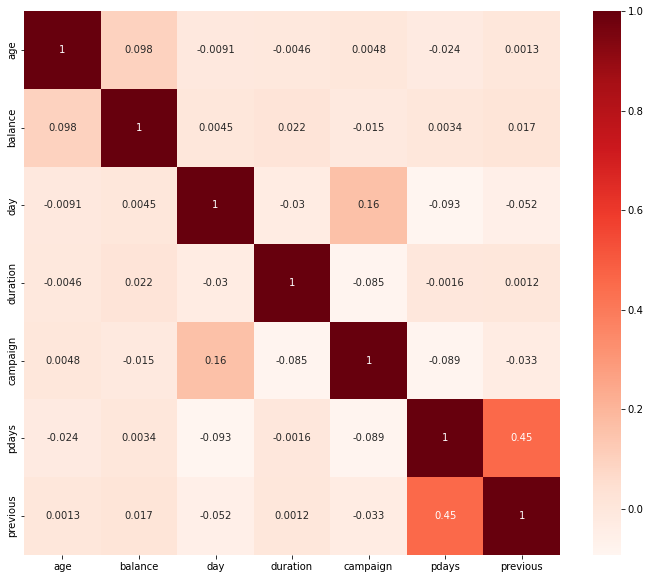

In [776]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [777]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()    

In [778]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

<AxesSubplot:>

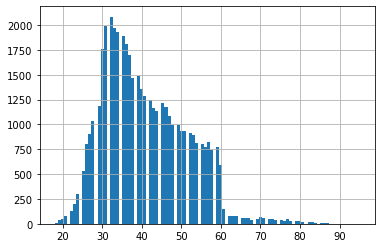

In [779]:
df['age'].hist(bins=100)

In [780]:
checkdf = df.loc[df['campaign'] > 5]
checkdf['y'].value_counts()

no     4102
yes     253
Name: y, dtype: int64

In [781]:
# # Drop No outlier
# df = df.drop(df[df['campaign'] >= 40].index)
# df['campaign'].value_counts()

# # Drop Yes outlier
# cp20up = df[df['campaign'] > 18]
# df = df.drop(cp20up[cp20up['y'] == 'yes'].index)

In [782]:
df['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

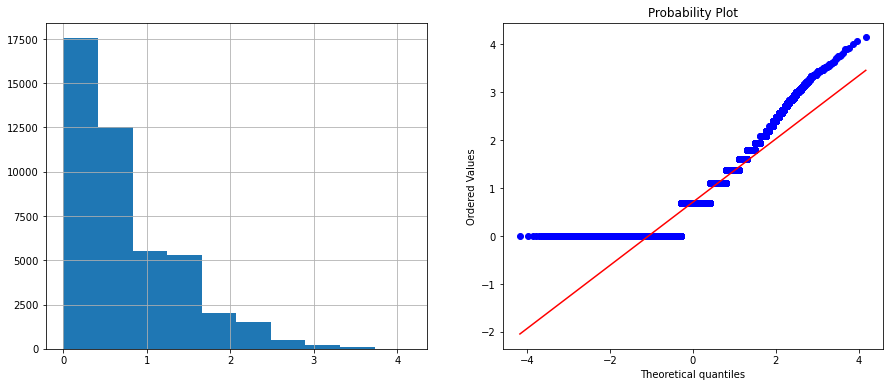

In [783]:
df['campaign']=np.log(df['campaign'])
diagnostic_plots(df,'campaign')

In [784]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1   # Interquartile range
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
outlier = df[(df['campaign'] > upper_lim) | (df['campaign'] < lower_lim)]
len(df['campaign']) - len(outlier)

44681

In [785]:
df = df.drop(outlier.index)
# df = df.drop(df[df['campaign'] > upper_lim].index)
# df = df.drop(df[df['campaign'] < lower_lim].index)
# df['campaign'] = df['campaign'][~(df['campaign'] > upper_lim) | (df['campaign'] < lower_lim)].astype(int)
df['y'].value_counts()

no     39405
yes     5276
Name: y, dtype: int64

<AxesSubplot:xlabel='campaign', ylabel='y'>

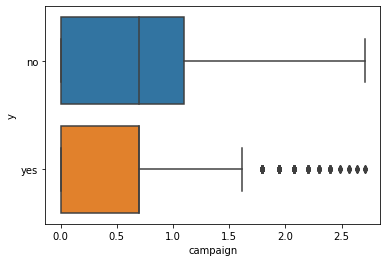

In [786]:
sns.boxplot(x='campaign', y='y', data=df)

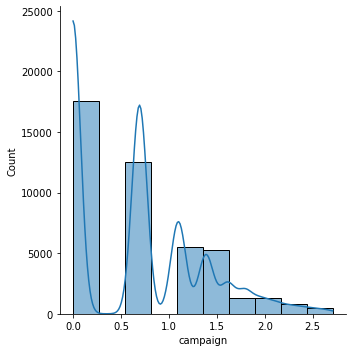

In [787]:
sns.displot(df['campaign'], bins=10 , kde=True)

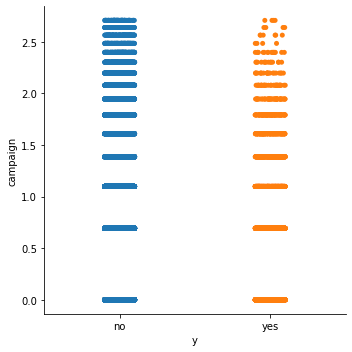

In [788]:
sns.catplot(x= 'y',y='campaign', data=df) # plot relationship between data

In [789]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.iloc[:,12:13] 
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.884
